In [4]:
# ====================================================
#1.IMPORTING REQUIRED LIBRARIES.
# ====================================================
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

In [5]:
# ====================================================
#2.LOADING DATASET
# ====================================================
df = pd.read_csv("world_population.csv")
print("Dataset Loaded Successfully \n" )

Dataset Loaded Successfully 



In [6]:
# ====================================================
#3.INITIAL EXPLORATION OF THE DATASET
# ====================================================
warnings.filterwarnings('ignore')
#PREVIEW OF THE DATASET

print("DATASET OVERVIEW \n")
df.head(5)

DATASET OVERVIEW 



,Rank,CCA3,Country/Territory,Capital,Continent,2022 Population,2020 Population,2015 Population,2010 Population,2000 Population,1990 Population,1980 Population,1970 Population,Area (km²),Density (per km²),Growth Rate,World Population Percentage
0,36,AFG,Afghanistan,Kabul,Asia,41128771,38972230,33753499,28189672,19542982,10694796,12486631,10752971,652230,63.0587,1.0257,0.52
1,138,ALB,Albania,Tirana,Europe,2842321,2866849,2882481,2913399,3182021,3295066,2941651,2324731,28748,98.8702,0.9957,0.04
2,34,DZA,Algeria,Algiers,Africa,44903225,43451666,39543154,35856344,30774621,25518074,18739378,13795915,2381741,18.8531,1.0164,0.56
3,213,ASM,American Samoa,Pago Pago,Oceania,44273,46189,51368,54849,58230,47818,32886,27075,199,222.4774,0.9831,0.00
4,203,AND,Andorra,Andorra la Vella,Europe,79824,77700,71746,71519,66097,53569,35611,19860,468,170.5641,1.0100,0.00


In [54]:
print("COUNT OF NULL VALUE")
df.isnull().sum()

COUNT OF NULL VALUE


Rank                           0
CCA3                           0
Country/Territory              0
Capital                        0
Continent                      0
2022 Population                0
2020 Population                0
2015 Population                0
2010 Population                0
2000 Population                0
1990 Population                0
1980 Population                0
1970 Population                0
Area (km²)                     0
Density (per km²)              0
Growth Rate                    0
World Population Percentage    0
dtype: int64

In [55]:
# ====================================================
#4.DESCRIPTIVE STATISTICS
# ====================================================

print("SUMMARY STATISTICS \n")
display(df.describe().T)

SUMMARY STATISTICS 



,count,mean,std,min,25%,50%,75%,max
Rank,234.0,1.175000e+02,6.769417e+01,1.0000,59.250000,1.175000e+02,1.757500e+02,2.340000e+02
2022 Population,234.0,3.407441e+07,1.367664e+08,510.0000,419738.500000,5.559944e+06,2.247650e+07,1.425887e+09
2020 Population,234.0,3.350107e+07,1.355899e+08,520.0000,415284.500000,5.493074e+06,2.144798e+07,1.424930e+09
2015 Population,234.0,3.172996e+07,1.304050e+08,564.0000,404676.000000,5.307400e+06,1.973085e+07,1.393715e+09
2010 Population,234.0,2.984524e+07,1.242185e+08,596.0000,393149.000000,4.942770e+06,1.915957e+07,1.348191e+09
2000 Population,234.0,2.626947e+07,1.116982e+08,651.0000,327242.000000,4.292907e+06,1.576230e+07,1.264099e+09
1990 Population,234.0,2.271022e+07,9.783217e+07,700.0000,264115.750000,3.825410e+06,1.186923e+07,1.153704e+09
1980 Population,234.0,1.898462e+07,8.178519e+07,733.0000,229614.250000,3.141146e+06,9.826054e+06,9.823725e+08
1970 Population,234.0,1.578691e+07,6.779509e+07,752.0000,155997.000000,2.604830e+06,8.817329e+06,8.225344e+08
Area (km²),234.0,5.814494e+05,1.761841e+06,1.0000,2650.000000,8.119950e+04,4.304258e+05,1.709824e+07


Let's have a look on the continent-wise population in 2022 :


<Figure size 800x500 with 0 Axes>

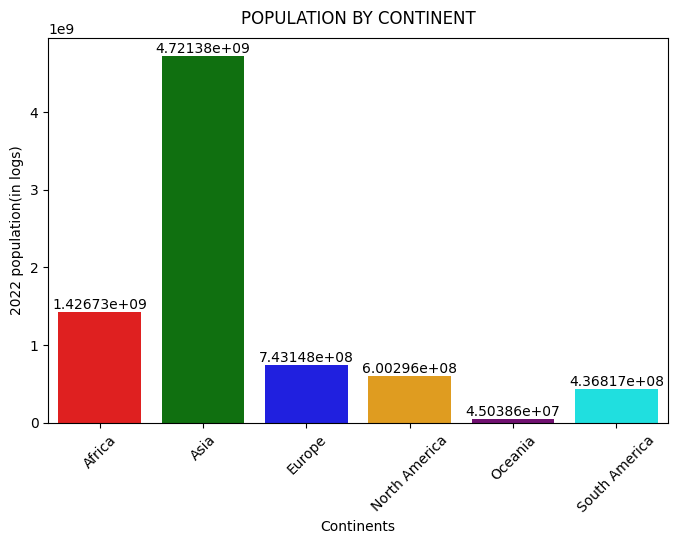

In [56]:
# ====================================================
# 5.POPULATION BY CONTINENT
# ====================================================
print("Let's have a look on the continent-wise population in 2022 :")
plt.figure(figsize=(8,5))
gb = df.groupby('Continent')['2022 Population'].agg('sum')
c =  ['red', 'green', 'blue', 'orange', 'purple', 'cyan']

pd.DataFrame(gb)
gb = gb.reset_index()
plt.figure(figsize=(8,5))
ax = sns.barplot(
    data=gb,
    x='Continent',
    y='2022 Population',
    hue='Continent',          # Assign hue
    palette=c,                # Your 6-color palette
    legend=False              # Optional: hide legend since x already shows the labels
)
ax.set_title("POPULATION BY CONTINENT" , pad= 10)
gb.shape
for i in range(gb.shape[0]):
    ax.bar_label(ax.containers[i])

ax.set_xlabel("Continents")
ax.set_ylabel("2022 population(in logs)")
plt.xticks(rotation=45)
plt.savefig("population by continent.jpg") 

**Insights:**

* Asia is the most densely populated continent with 4.7B people followed by Africa, Europe and others.

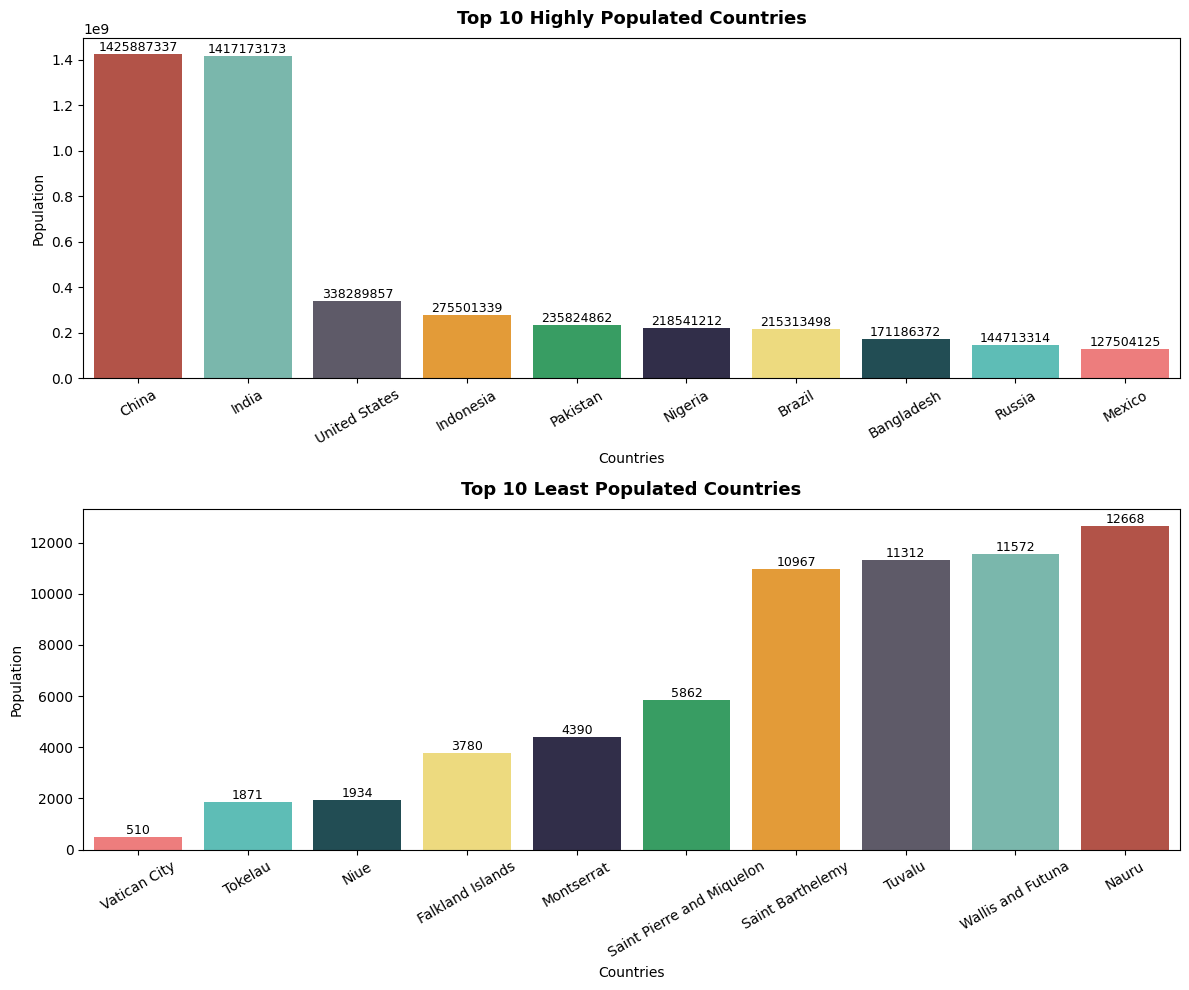

<Figure size 640x480 with 0 Axes>

In [63]:
# ====================================================
#6.TOP 10 HIGHLY POPULATED COUNTRIES A
# ====================================================



fig, axes = plt.subplots(2, 1, figsize=(12, 10))


colors = [
    '#FF6B6B',  # Bright Coral Red
    '#4ECDC4',  # Turquoise Mint
    '#1A535C',  # Dark Teal
    '#FFE66D',  # Bright Yellow
    '#2E294E',  # Deep Indigo
    '#27ae60',  # Dark Emerald
    '#FF9F1C',  # Vibrant Orange
    '#5D576B',  # Muted Purple-Gray
    '#70C1B3',  # Soft Aqua
    '#C44536'   # Rich Brick Red
]

# --- 1️⃣ Top 10 Highly Populated Countries ---
top_pop = df.nlargest(10, '2022 Population')

ax1 = sns.barplot(
    data=top_pop,
    x='Country/Territory',
    y='2022 Population',
    hue='2022 Population',
    palette=colors,
    ax=axes[0]
)
for container in ax1.containers:
    ax1.bar_label(container, fmt='%.0f', label_type='edge', fontsize=9)

ax1.set_title("Top 10 Highly Populated Countries", pad=10, fontsize=13, fontweight='bold')
ax1.set_xlabel("Countries")
ax1.set_ylabel("Population")
ax1.tick_params(axis='x', rotation=30)
ax1.legend_.remove()

#7.Top 10 Least Populated Countries 
bottom_pop = df.nsmallest(10, '2022 Population')

ax2 = sns.barplot(
    data=bottom_pop,
    x='Country/Territory',
    y='2022 Population',
    hue='2022 Population',
    palette=colors,
    ax=axes[1]
)
for container in ax2.containers:
    ax2.bar_label(container, fmt='%.0f', label_type='edge', fontsize=9)

ax2.set_title("Top 10 Least Populated Countries", pad=10, fontsize=13, fontweight='bold')
ax2.set_xlabel("Countries")
ax2.set_ylabel("Population")
ax2.tick_params(axis='x', rotation=30)
ax2.legend_.remove()

# Adjust spacing
plt.tight_layout()
plt.show()
plt.savefig("Most and least country.jpg") 


**Insights:**

* China is the most densely populated country with 1.4B people followed by India, United States and others.
* Vatican City is the least populated country with 510 people followed by Tokelau, Niue and others.

Let's have a look on the ratios of continent-wise population in 2022 :


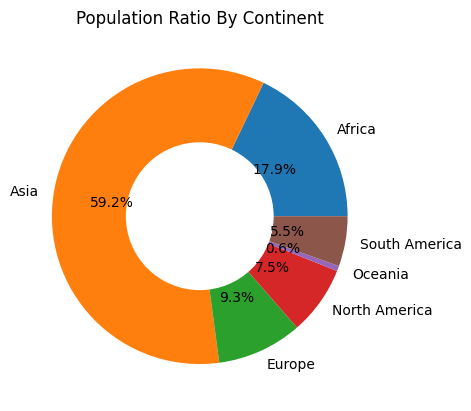

<Figure size 640x480 with 0 Axes>

In [58]:
# ====================================================
# 8.RATIO OF THE POPULATION BY CONTINENT
# ====================================================
print("Let's have a look on the ratios of continent-wise population in 2022 :")
labels = gb['Continent']
plt.pie(gb["2022 Population"] ,
        labels= labels,
        autopct = "%1.1f%%",
        #explode= [0,0.1,0,0.1,0.1,0.1]
       )
colors = ['#a40000', '#e94f37', '#f6aa1c', '#f4d35e', '#d2cc83', '#eee2dc']

centre_circle = plt.Circle((0,0), 0.50, fc='white')
fig = plt.gcf()
fig.gca().add_artist(centre_circle)
plt.title("Population Ratio By Continent")
plt.show()
plt.savefig("Ratio.jpg") 


**Insights:**

* In world population 59.21% from Asia, 17.89% from Africa, 9.32% from Europe,7.53% from North America, 5.48% from South America and 0.56% from Oceania.

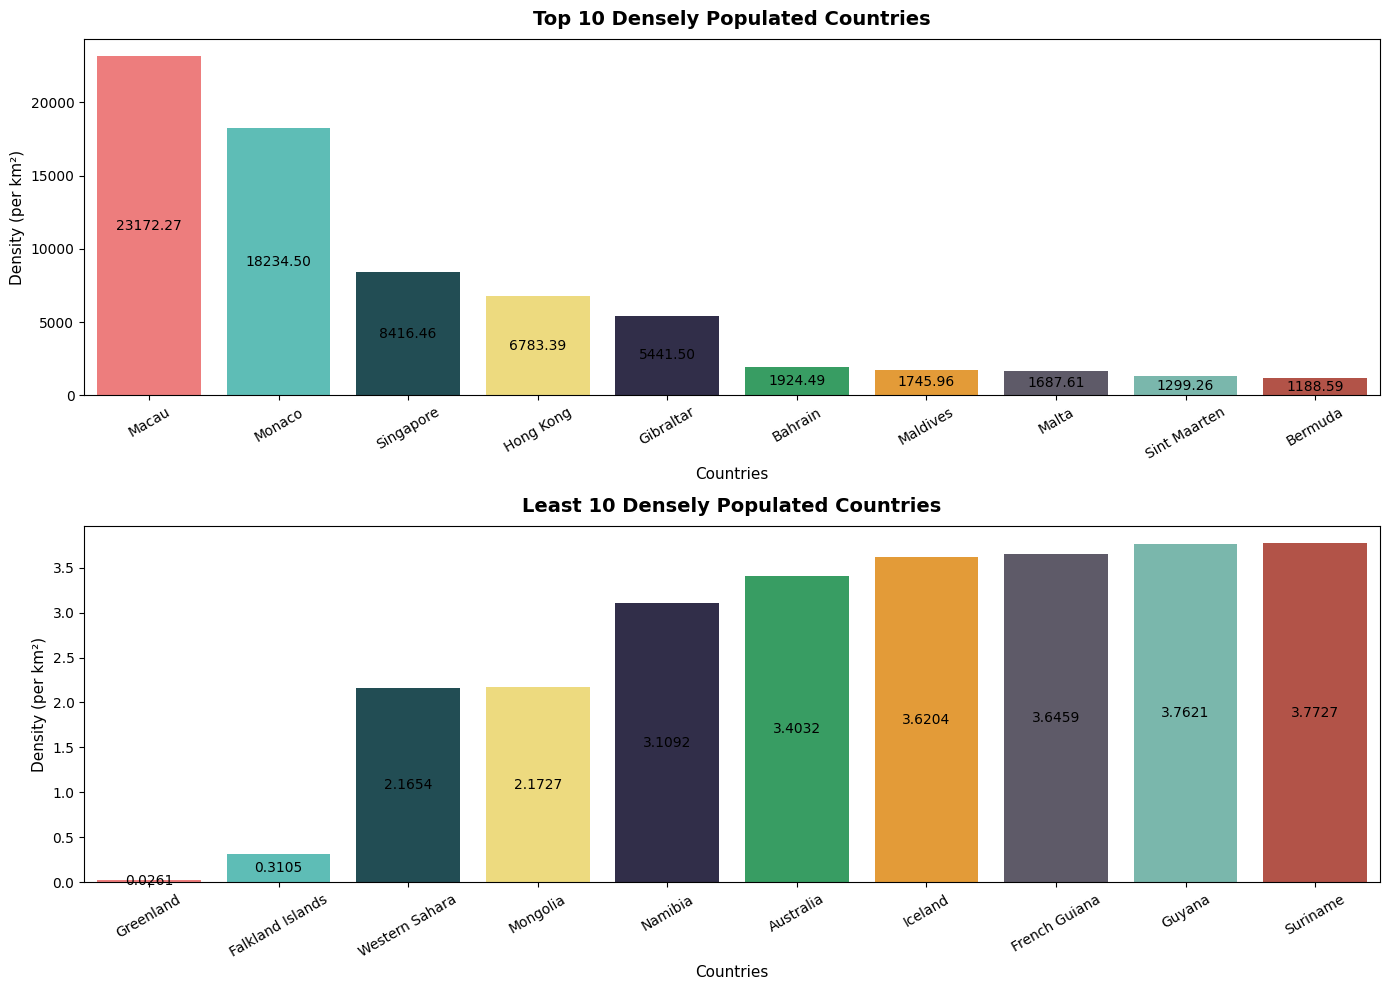

<Figure size 640x480 with 0 Axes>

In [59]:


colors = [
    '#FF6B6B',  # Bright Coral Red
    '#4ECDC4',  # Turquoise Mint
    '#1A535C',  # Dark Teal
    '#FFE66D',  # Bright Yellow
    '#2E294E',  # Deep Indigo
    '#27ae60',  # Dark Emerald
    '#FF9F1C',  # Vibrant Orange
    '#5D576B',  # Muted Purple-Gray
    '#70C1B3',  # Soft Aqua
    '#C44536'   # Rich Brick Red
]


hden = df.nlargest(10, 'Density (per km²)')
lden = df.nsmallest(10, 'Density (per km²)')


fig, axes = plt.subplots(2, 1, figsize=(14, 10))

# =============================
#8.Top 10 Densely Populated Countries
# =============================
ax1 = sns.barplot(
    data=hden,
    x='Country/Territory',
    y='Density (per km²)',
    palette=colors,
    ax=axes[0]
)


for bar in ax1.patches:
    height = bar.get_height()
    if height > 0:
        x = bar.get_x() + bar.get_width() / 2
        y = height / 2
        ax1.text(x, y, f'{height:.2f}', ha='center', va='center', fontsize=10, color='black')

ax1.set_title("Top 10 Densely Populated Countries", pad=10, fontsize=14, fontweight='bold')
ax1.set_xlabel("Countries", fontsize=11)
ax1.set_ylabel("Density (per km²)", fontsize=11)
ax1.tick_params(axis='x', rotation=30)



# =============================
#9Least 10 Densely Populated Countries
# =============================
ax2 = sns.barplot(
    data=lden,
    x='Country/Territory',
    y='Density (per km²)',
    palette=colors,
    ax=axes[1]
)


for bar in ax2.patches:
    height = bar.get_height()
    if height > 0:
        x = bar.get_x() + bar.get_width() / 2
        y = height / 2
        ax2.text(x, y, f'{height:.4f}', ha='center', va='center', fontsize=10, color='black')

ax2.set_title("Least 10 Densely Populated Countries", pad=10, fontsize=14, fontweight='bold')
ax2.set_xlabel("Countries", fontsize=11)
ax2.set_ylabel("Density (per km²)", fontsize=11)
ax2.tick_params(axis='x', rotation=30)



plt.tight_layout()
plt.show()
plt.savefig("Density.jpg") 


**Insights:**

* Macau is the most densely populated country with more than 23172 people in per square kilometer followed by Monaco, Singapore and others.
* Greenland is the least densely populated country with 0.0261 people in per square kilometer followed by Falkland Island, Western Sahara and others.

Pearson Correlation Of Features


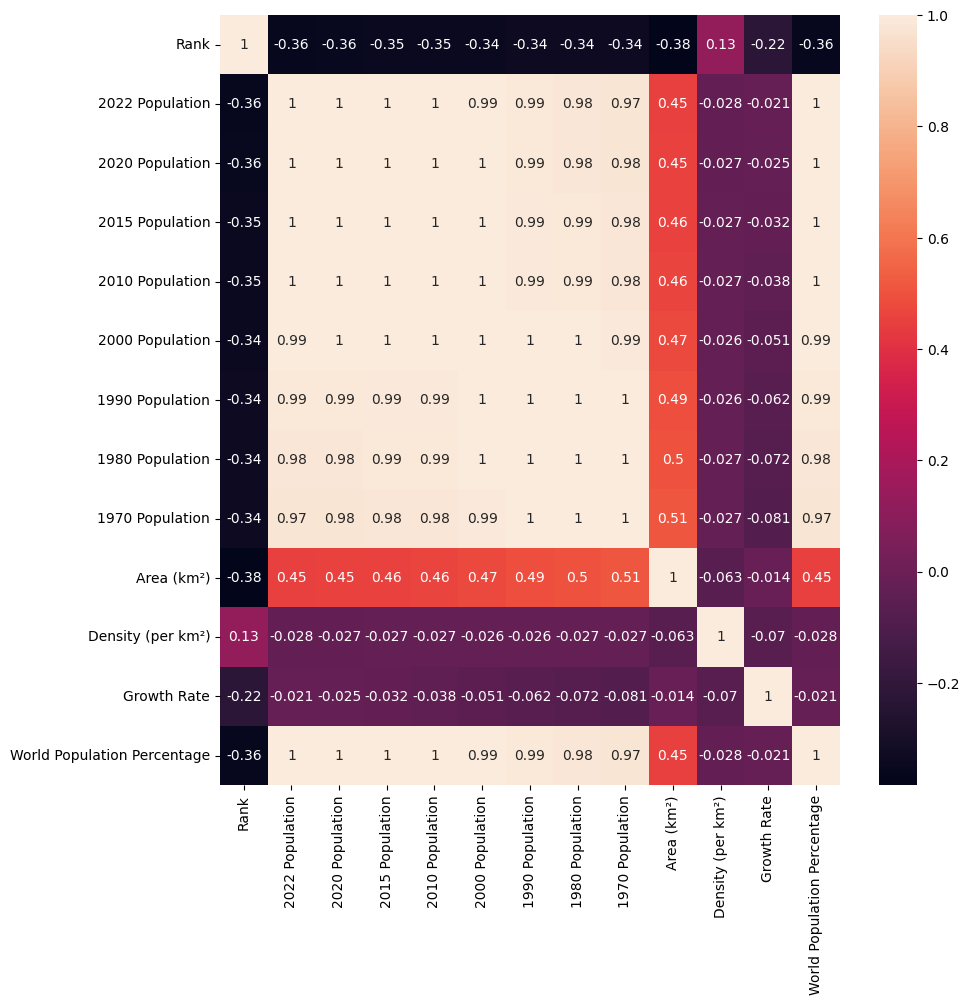

In [7]:
# ====================================================
#10.Pearson Correlation Of Features
# ====================================================
print("Pearson Correlation Of Features")

plt.figure(figsize = (10,10))
numeric_df = df.select_dtypes(include=['number'])
sns.heatmap(data = numeric_df.corr( method= 'pearson',) , annot = True ,)
# df.corr()
plt.savefig("pearson.jpg") 


**Insights:**

* High correlation between population and world population percentage. Also high correlation between country and CCA3 code as expected.
* Medium correlation between area and population, area and world population percentage.
  

In [61]:
population_columns = [col for col in df.columns if 'Population' in col and 'World' not in col]
population_columns

['2022 Population',
 '2020 Population',
 '2015 Population',
 '2010 Population',
 '2000 Population',
 '1990 Population',
 '1980 Population',
 '1970 Population']

🌍 Total World Population Over Time (1970–2022)


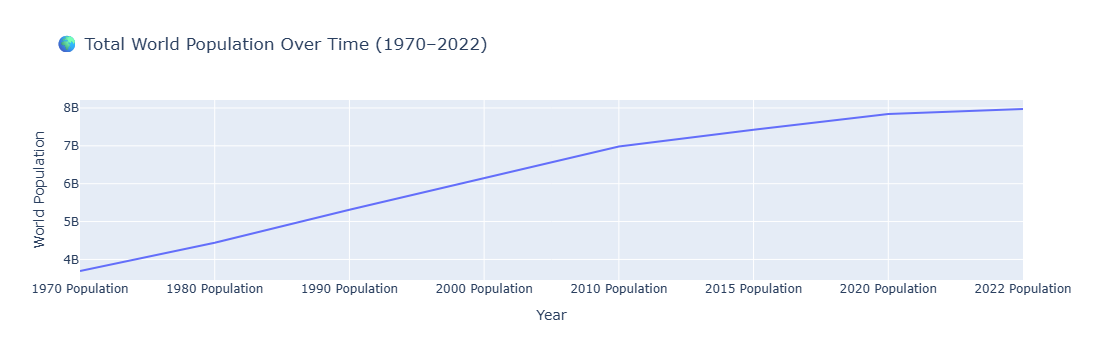

<Figure size 640x480 with 0 Axes>

In [62]:
# ====================================================
#11.Total World Population Over Time (1970–2022)
# ====================================================

print("🌍 Total World Population Over Time (1970–2022)")

df_melted = df.melt(
    id_vars=['Country/Territory'],
    value_vars= population_columns,
    var_name='Year',
    value_name='Population'
)
world_pop = df_melted.groupby('Year')['Population'].sum().reset_index()

import plotly.express as px

fig = px.line(
    world_pop,
    x='Year',
    y='Population',
    title='🌍 Total World Population Over Time (1970–2022)',
    labels={'Population': 'World Population'}
)
fig.show()
plt.savefig("Population over time.jpg") 


**Insights:**

* From 1970 to 2010 the population increased linearly then the population rate decreases.
  